In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np

In [30]:
plt.rcParams['figure.figsize'] = (20, 5)

In [2]:
cols = ['bayesian_prediction_std_bal_acc',
        'bayesian_prediction_std_f1_score', 'bayesian_prediction_std_auc',
        'bayesian_entropy_bal_acc', 'bayesian_entropy_f1_score',
        'bayesian_entropy_auc']

In [3]:
df_with = pd.read_csv('bayesian_uncertainty_with_unknown.csv')
df_with_results = df_with.groupby(['inside_labels', 'unknown_labels']).mean()[cols]

In [4]:
df_without = pd.read_csv('bayesian_uncertainty_without_unknown.csv')
df_without_results = df_without.groupby(['inside_labels', 'unknown_labels']).mean()[cols]

In [5]:
df_dropout_with = pd.read_csv('mlp_dropout_uncertainty_with_unknown.csv')
df_dropout_with_results = df_dropout_with.groupby(['inside_labels', 'unknown_labels']).mean()[cols]

In [6]:
df_dropout_without = pd.read_csv('mlp_dropout_uncertainty_without_unknown.csv')
df_dropout_without_results = df_dropout_without.groupby(['inside_labels', 'unknown_labels']).mean()[cols]

In [7]:
df_deterministic_with = pd.read_csv('mlp_deterministic_uncertainty_with_unknown.csv')
df_deterministic_with_results = df_deterministic_with.groupby(['inside_labels', 'unknown_labels']).mean()[cols]

In [8]:
df_deterministic_without = pd.read_csv('mlp_deterministic_uncertainty_without_unknown.csv')
df_deterministic_without_results = df_deterministic_without.groupby(['inside_labels', 'unknown_labels']).mean()[cols]

In [9]:
results_cols = ['inside', 'outside',
                'with_std_acc', 'out_std_acc',
                'with_std_auc', 'out_std_auc',
                'with_entropy_acc', 'out_entropy_acc',
                'with_entropy_auc', 'out_entropy_auc']
bayesian_results = pd.DataFrame(columns=results_cols)
for (wkey, *wrow), (okey, *orow) in zip(df_with_results.itertuples(), df_without_results.itertuples()):
    assert wkey == okey
    bayesian_results.loc[len(bayesian_results)] = [
        wkey[0], wkey[1],
        wrow[0], orow[0],
        wrow[2], orow[2],
        wrow[3], orow[3],
        wrow[5], orow[5]
    ]

In [10]:
results_cols = ['inside', 'outside',
                'with_std_acc', 'out_std_acc',
                'with_std_auc', 'out_std_auc',
                'with_entropy_acc', 'out_entropy_acc',
                'with_entropy_auc', 'out_entropy_auc']
dropout_results = pd.DataFrame(columns=results_cols)
for (wkey, *wrow), (okey, *orow) in zip(df_dropout_with_results.itertuples(), df_dropout_without_results.itertuples()):
    assert wkey == okey
    dropout_results.loc[len(dropout_results)] = [
        wkey[0], wkey[1],
        wrow[0], orow[0],
        wrow[2], orow[2],
        wrow[3], orow[3],
        wrow[5], orow[5]
    ]

In [11]:
results_cols = ['inside', 'outside',
                'with_std_acc', 'out_std_acc',
                'with_std_auc', 'out_std_auc',
                'with_entropy_acc', 'out_entropy_acc',
                'with_entropy_auc', 'out_entropy_auc']
deterministic_results = pd.DataFrame(columns=results_cols)
for (wkey, *wrow), (okey, *orow) in zip(df_deterministic_with_results.itertuples(), df_deterministic_without_results.itertuples()):
    assert wkey == okey
    deterministic_results.loc[len(deterministic_results)] = [
        wkey[0], wkey[1],
        wrow[0], orow[0],
        wrow[2], orow[2],
        wrow[3], orow[3],
        wrow[5], orow[5]
    ]

In [17]:
final_results_cols = ['inside', 'outside']
for c in results_cols[2:]:
    final_results_cols.append('bayesian_'+c)
    final_results_cols.append('dropout_'+c)
    final_results_cols.append('deterministic_'+c)

final_results = pd.DataFrame(columns=final_results_cols)
for (bayes_key, *bayes_row), (do_key, *do_row), (det_key, *det_row)  in zip(bayesian_results.itertuples(), 
                                                                            dropout_results.itertuples(),
                                                                            deterministic_results.itertuples()):
    assert bayes_row[0] == do_row[0]
    assert bayes_row[1] == do_row[1]
    assert bayes_row[0] == det_row[0]
    assert bayes_row[1] == det_row[1]
    
    row = [bayes_row[0], bayes_row[1]]
    
    for bayes_value, dropout_value, deterministic_value in zip(bayes_row[2:], do_row[2:], det_row[2:]):
        row.append(bayes_value)
        row.append(dropout_value)
        row.append(deterministic_value)
    final_results.loc[len(final_results)] = row

In [ ]:
final_results.mean()

/Users/roliveira/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


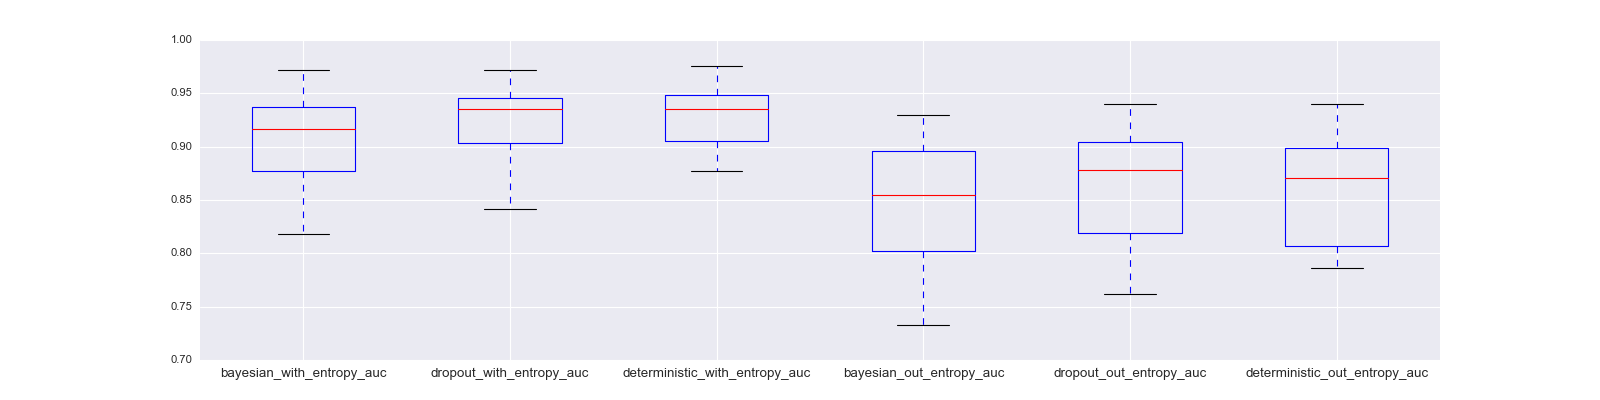

{'boxes': [<matplotlib.lines.Line2D at 0x1199b62e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1199bdcf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1199c2f28>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1199c26d8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1199b6c18>,
  <matplotlib.lines.Line2D at 0x11997f9b0>]}

In [31]:
final_results.boxplot(column=['bayesian_with_entropy_auc', 'dropout_with_entropy_auc', 'deterministic_with_entropy_auc', 
                              'bayesian_out_entropy_auc', 'dropout_out_entropy_auc', 'deterministic_out_entropy_auc'])

In [33]:
final_results.to_csv('final_results.csv', index=False)